In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(cv2.__version__)

3.3.1


In [3]:
img=cv2.imread("image.jpg")

In [4]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
# Blurring

In [7]:
blur = cv2.blur(img,(5,5))
cv2.imshow('Blurring',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
blur = cv2.GaussianBlur(img,(5,5),0)
cv2.imshow('Blurring',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
blur = cv2.bilateralFilter(img,9,75,75)
cv2.imshow('Blurring',blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
HSV_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [6]:
cv2.imshow('HSV format image',HSV_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
# K-means Segmentation

In [26]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(256, 256, 3)


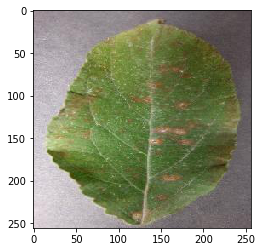

In [27]:
pic = plt.imread('image.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [28]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(65536, 3)

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

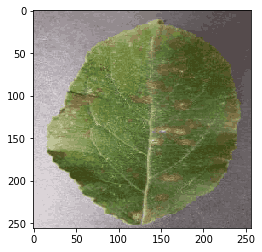

In [38]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

In [70]:
# applying the feature descriptor


In [71]:
img = cv2.imread('image.jpg')

In [72]:
surf = cv2.xfeatures2d.SURF_create(400)

In [73]:

# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img,None)
len(kp)

93

In [85]:
print(kp)

[<KeyPoint 00000180C9969240>, <KeyPoint 00000180C99690F0>, <KeyPoint 00000180C9969C00>, <KeyPoint 00000180C99691E0>, <KeyPoint 00000180C9969840>, <KeyPoint 00000180C9969450>, <KeyPoint 00000180C9969630>, <KeyPoint 00000180C99695A0>, <KeyPoint 00000180C99699F0>, <KeyPoint 00000180C9969180>, <KeyPoint 00000180CC998870>, <KeyPoint 00000180CC9987E0>, <KeyPoint 00000180CC998930>, <KeyPoint 00000180CC998960>, <KeyPoint 00000180CC9988A0>, <KeyPoint 00000180CC9988D0>, <KeyPoint 00000180CC998990>, <KeyPoint 00000180CC998900>, <KeyPoint 00000180CC9986C0>, <KeyPoint 00000180CC998690>, <KeyPoint 00000180CC998810>, <KeyPoint 00000180CC998840>, <KeyPoint 00000180CC998750>, <KeyPoint 00000180CC9986F0>, <KeyPoint 00000180CC998720>, <KeyPoint 00000180CC998780>, <KeyPoint 00000180CC9987B0>, <KeyPoint 00000180CC9985D0>, <KeyPoint 00000180CC9985A0>, <KeyPoint 00000180CC998630>, <KeyPoint 00000180CC998660>, <KeyPoint 00000180CC998600>, <KeyPoint 00000180CC9984E0>, <KeyPoint 00000180CC998510>, <KeyPoint 000

In [86]:
print(des)

[[-0.00197414  0.00204844  0.00252682 ... -0.00021328  0.0004406
   0.0007156 ]
 [ 0.00201019 -0.00558398  0.00293651 ...  0.00045202  0.00095412
   0.00158808]
 [ 0.00046569 -0.00087864  0.00247866 ...  0.00034868  0.00207029
   0.00151704]
 ...
 [ 0.00018346 -0.00071348  0.00257597 ...  0.00140659  0.0019376
   0.00383209]
 [ 0.00209841  0.0015706   0.00474982 ...  0.00252864  0.00503715
   0.00311596]
 [ 0.00049487  0.00531731  0.00455557 ...  0.01839648  0.01696594
   0.01892632]]


In [74]:
img2 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)

In [98]:
cv2.imshow('image',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [82]:
# global Feature
global_feature = des

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_feature)

In [92]:
global_feature.shape

(93, 64)

In [94]:
surf.descriptorSize()

64

In [106]:
print("[STATUS] feature vector size {}".format(np.array(global_feature).shape))


[STATUS] feature vector size (93, 64)


In [107]:
import numpy
a = numpy.asarray([ [1,2,3], [4,5,6], [7,8,9] ])
numpy.savetxt("foo.csv", a, delimiter=",")

In [108]:
import numpy
a = global_feature
numpy.savetxt("doo.csv", a, delimiter=",")